In [318]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
sns.set(style="white")

In [319]:
#get rid of .loc warning
pd.options.mode.chained_assignment = None #get rid of .loc warning

#display all columns in dataframe
pd.set_option("display.max_columns",50)

In [320]:
cd /Users/chris/OneDrive/Diaporthe/csv_files

C:\Users\chris\OneDrive\Diaporthe\csv_files


In [321]:
data = pd.read_csv('macro_067_complete_summary.csv', header=0)
data.head()

,macrogen_id,brip_id,mac_id,other_id,dna_conc,gene_region,f_primer,r_primer,m13_vector,pcr_date,band_intensity,isolate_type,notes,M13F_qual>20,M13R_qual>20,direction,accession,organism,nt_match,nt_total,percent_match
0,1,BRIP-66142,MAC-17-43,CW-2A2,NaN,TUB,T1,bt2b,Yes,21/02/2018,strong,Chris honours isolates,NaN,617,621,M13F,KF170920.1,Diaporthe fraxini-angustifoliae strain BRIP 54...,697,746,93
1,1,BRIP-66142,MAC-17-43,CW-2A2,NaN,TUB,T1,bt2b,Yes,21/02/2018,strong,Chris honours isolates,NaN,617,621,M13R,KF170920.1,Diaporthe fraxini-angustifoliae strain BRIP 54...,698,766,91
2,2,BRIP-66143,MAC-17-44,CW-2A1,NaN,TUB,T1,bt2b,Yes,28/02/2018,weak,Chris honours isolates,NaN,17,17,M13F,-,-,-,-,-
3,2,BRIP-66143,MAC-17-44,CW-2A1,NaN,TUB,T1,bt2b,Yes,28/02/2018,weak,Chris honours isolates,NaN,17,17,M13R,-,-,-,-,-
4,3,BRIP-66144,MAC-17-45,CW-4A2,NaN,TUB,T1,bt2b,Yes,21/02/2018,weak,Chris honours isolates,NaN,70,153,M13F,-,-,-,-,-


In [322]:
tub_samples = data[(data['gene_region'] == 'TUB')]
ef_samples = data[(data['gene_region'] == 'EF')]
its_samples = data[(data['gene_region'] == 'ITS')]

In [323]:
%matplotlib inline

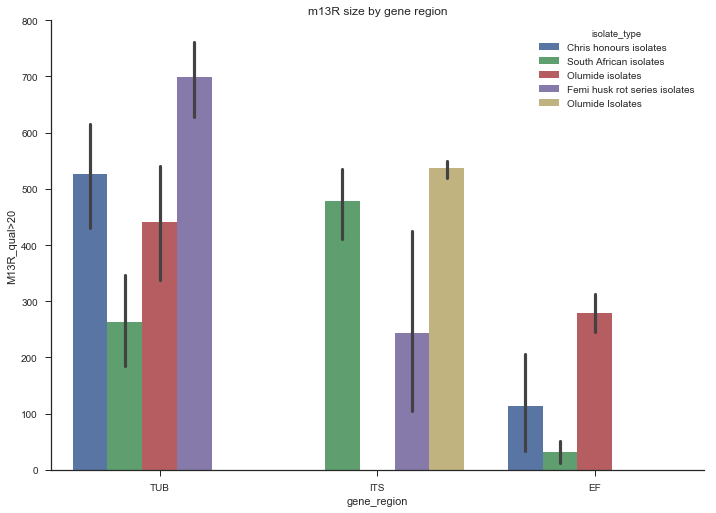

In [324]:
# general plot settings
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)


sns_plot = sns.barplot(x='gene_region', y='M13R_qual>20', hue='isolate_type', data=data,
            order=['TUB', 'ITS', 'EF'])
plt.title("m13R size by gene region")  
sns.despine() #removes border (around top and right of fig)

fig = sns_plot.get_figure()
fig.savefig('example.png') #(os.getcwd to find location of saved figure)



**The issue with the graphs above, is that we're taking F and R fragments seperately. If we want to look at them together, we need to melt the dataframes using pd.melt before plotting**

In [325]:
tub_iso_melt = pd.melt(tub_samples, id_vars=['isolate_type'], value_vars=['M13F_qual>20', 'M13R_qual>20'])

In [326]:
tub_iso_melt.head(1)

,isolate_type,variable,value
0,Chris honours isolates,M13F_qual>20,617


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

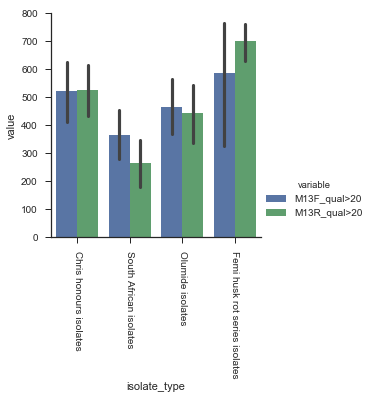

In [327]:
sns.factorplot(x='isolate_type', y='value', hue='variable', data=tub_iso_melt, kind='bar')
plt.xticks(rotation=270)

In [328]:
tub_intensity_melt = pd.melt(tub_samples, id_vars=['band_intensity'], value_vars=['M13F_qual>20', 'M13R_qual>20'])

In [329]:
tub_intensity_melt.head(2)

,band_intensity,variable,value
0,strong,M13F_qual>20,617
1,strong,M13F_qual>20,617


Notice from the first plot (commented out) that 'contaminated' sequences are present as a group. Since there was only 1 or 2 samples in this category, we'll exclude it.

In [330]:
tub_intensity_melt = tub_intensity_melt[tub_intensity_melt['band_intensity'] != 'contam']

In [331]:
#sns.factorplot(x='variable', y='value', hue='band_intensity', data=tub_intensity_melt, kind='bar')
#plt.xticks(rotation=270)

Text(34.4535,0.5,'Q>20 length (bp)')

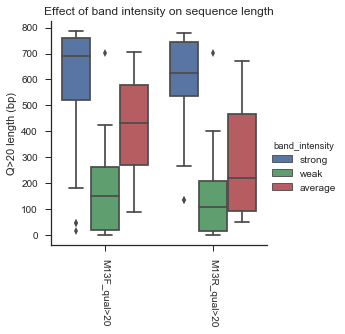

In [332]:
sns.factorplot(x='variable', y='value', hue='band_intensity', data=tub_intensity_melt, kind='box') #try 'bar' and 'strip'
plt.xticks(rotation=270)
plt.title("Effect of band intensity on sequence length")
plt.xlabel("")
plt.ylabel("Q>20 length (bp)")

#paramters for 'kind=': point, bar, count, box, violin, strip

We can see from the boxplot above that band intensity is clearly correlated with the quality of the sequence. There are only a couple of outliers in which weak bandes sequenced well. It may be worth considering just not sequencing poor bands in the future.

In [333]:
tub_samples.head(2)

,macrogen_id,brip_id,mac_id,other_id,dna_conc,gene_region,f_primer,r_primer,m13_vector,pcr_date,band_intensity,isolate_type,notes,M13F_qual>20,M13R_qual>20,direction,accession,organism,nt_match,nt_total,percent_match
0,1,BRIP-66142,MAC-17-43,CW-2A2,NaN,TUB,T1,bt2b,Yes,21/02/2018,strong,Chris honours isolates,NaN,617,621,M13F,KF170920.1,Diaporthe fraxini-angustifoliae strain BRIP 54...,697,746,93
1,1,BRIP-66142,MAC-17-43,CW-2A2,NaN,TUB,T1,bt2b,Yes,21/02/2018,strong,Chris honours isolates,NaN,617,621,M13R,KF170920.1,Diaporthe fraxini-angustifoliae strain BRIP 54...,698,766,91


# TUB

**Is dna concentration (of my South African isolates) correlated with**
    1. band intensity
    2. Q20 scores
**Examine both TUB and ITS regions which were sequenced.**

In [334]:
tub_samples['isolate_type'].unique()

array(['Chris honours isolates', 'South African isolates',
       'Olumide isolates', 'Femi husk rot series isolates'], dtype=object)

In [335]:
sa_mask = tub_samples['isolate_type'] == 'South African isolates'
sa_subset = tub_samples[sa_mask]

In [336]:
sa_subset

,macrogen_id,brip_id,mac_id,other_id,dna_conc,gene_region,f_primer,r_primer,m13_vector,pcr_date,band_intensity,isolate_type,notes,M13F_qual>20,M13R_qual>20,direction,accession,organism,nt_match,nt_total,percent_match
56,29,BRIP-66516,NaN,NaN,0.170,TUB,T1,bt2b,Yes,21/02/2018,strong,South African isolates,NaN,616,575,M13F,KF170920.1,Diaporthe fraxini-angustifoliae strain BRIP 54...,699,735,95
57,29,BRIP-66516,NaN,NaN,0.170,TUB,T1,bt2b,Yes,21/02/2018,strong,South African isolates,NaN,616,575,M13R,KF170920.1,Diaporthe fraxini-angustifoliae strain BRIP 54...,670,759,88
58,30,BRIP-66517,NaN,NaN,0.943,TUB,T1,bt2b,Yes,21/02/2018,strong,South African isolates,NaN,765,671,M13F,KF170920.1,Diaporthe fraxini-angustifoliae strain BRIP 54...,712,735,97
59,30,BRIP-66517,NaN,NaN,0.943,TUB,T1,bt2b,Yes,21/02/2018,strong,South African isolates,NaN,765,671,M13R,KF170920.1,Diaporthe fraxini-angustifoliae strain BRIP 54...,715,753,95
60,31,BRIP-66518,NaN,NaN,0.229,TUB,T1,bt2b,Yes,21/02/2018,average,South African isolates,NaN,707,94,M13F,KF170920.1,Diaporthe fraxini-angustifoliae strain BRIP 54...,709,735,96
61,31,BRIP-66518,NaN,NaN,0.229,TUB,T1,bt2b,Yes,21/02/2018,average,South African isolates,NaN,707,94,M13R,KC145169.1,"Phomopsis sp. CYP3 18S ribosomal RNA gene, par...",424,494,86
62,32,BRIP-66519,NaN,NaN,0.136,TUB,T1,bt2b,Yes,21/02/2018,weak,South African isolates,NaN,152,132,M13F,KX020566.1,Phomopsis sp. strain H213 18S ribosomal RNA ge...,437,496,88
63,32,BRIP-66519,NaN,NaN,0.136,TUB,T1,bt2b,Yes,21/02/2018,weak,South African isolates,NaN,152,132,M13R,HQ130721.1,"Phomopsis sp. WF167W 18S ribosomal RNA gene, p...",437,511,86
64,33,BRIP-66520,NaN,NaN,0.646,TUB,T1,bt2b,Yes,21/02/2018,strong,South African isolates,NaN,754,767,M13F,KP213109.1,Phialemonium dimorphosporum isolate IBVD02 bet...,389,436,89
65,33,BRIP-66520,NaN,NaN,0.646,TUB,T1,bt2b,Yes,21/02/2018,strong,South African isolates,NaN,754,767,M13R,KP213109.1,Phialemonium dimorphosporum isolate IBVD02 bet...,382,438,87


Looking at the dataset, we have duplicates for every macrogen ID (was done as to match with seperate F/R blastn results). Plotting these values will effect correlation, since every point will be essentially plotted twice. Therefore we'd better slice out every second row. To check that it works, compare the new sliced dataframe with a list of unique values from the first.

In [337]:
unique_ids = sa_subset['macrogen_id'].unique()
#unique_ids

In [338]:
sa_subset = sa_subset.iloc[::2, :]
sa_subset.head(4)

,macrogen_id,brip_id,mac_id,other_id,dna_conc,gene_region,f_primer,r_primer,m13_vector,pcr_date,band_intensity,isolate_type,notes,M13F_qual>20,M13R_qual>20,direction,accession,organism,nt_match,nt_total,percent_match
56,29,BRIP-66516,NaN,NaN,0.170,TUB,T1,bt2b,Yes,21/02/2018,strong,South African isolates,NaN,616,575,M13F,KF170920.1,Diaporthe fraxini-angustifoliae strain BRIP 54...,699,735,95
58,30,BRIP-66517,NaN,NaN,0.943,TUB,T1,bt2b,Yes,21/02/2018,strong,South African isolates,NaN,765,671,M13F,KF170920.1,Diaporthe fraxini-angustifoliae strain BRIP 54...,712,735,97
60,31,BRIP-66518,NaN,NaN,0.229,TUB,T1,bt2b,Yes,21/02/2018,average,South African isolates,NaN,707,94,M13F,KF170920.1,Diaporthe fraxini-angustifoliae strain BRIP 54...,709,735,96
62,32,BRIP-66519,NaN,NaN,0.136,TUB,T1,bt2b,Yes,21/02/2018,weak,South African isolates,NaN,152,132,M13F,KX020566.1,Phomopsis sp. strain H213 18S ribosomal RNA ge...,437,496,88


In [339]:
sa_subset['macrogen_id'] == unique_ids #check to confirm id's are all accounted for

56     True
58     True
60     True
62     True
64     True
66     True
68     True
70     True
72     True
74     True
76     True
78     True
80     True
82     True
133    True
135    True
Name: macrogen_id, dtype: bool

**To do list:**
1. replace band strength with 3 = strong, 2 = average, 1 = weak (contam doesnt matter for this subset)
2. make scatter plot of band strength vs dna conc. check linear correlation

In [340]:
#convert band intensities to a numerical scale for plotting
sa_subset['band_intensity'].replace(to_replace=['strong', 'average', 'weak'], value=[3, 2, 1], inplace=True)

In [341]:
x = sa_subset['dna_conc']
y = sa_subset['band_intensity']
corr_coef = x.corr(y)

Text(3.4,0.54,'r = 0.486')

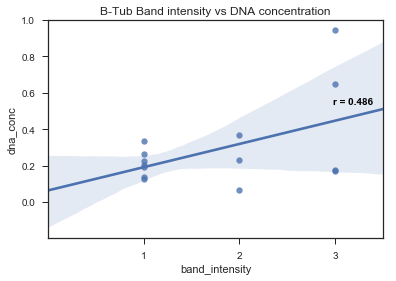

In [342]:
fig, ax = plt.subplots()
ax.set_xticks([1,2,3], minor=False)
ax.set_xlim(0, 3.5)

sns_plot = sns.regplot(x=y, y=x, data=sa_subset, marker="o", scatter_kws={'s':40}, ax=ax)
sns_plot.set_title("B-Tub Band intensity vs DNA concentration")
sns_plot.text(3.4, 0.54, "r = %.3f" % corr_coef, horizontalalignment='right', size='medium', color='black', weight='semibold')

There appears to be reasonable positive correlation between band intensity and DNA concentration. There weren't that many samples with strong band intensities however, in the case of SA isolates. Now it's worth seeing if this carried over directly to the sequencing (Q>20)

In [343]:
sa_subset.columns

Index(['macrogen_id', 'brip_id', 'mac_id', 'other_id', 'dna_conc',
       'gene_region', 'f_primer', 'r_primer', 'm13_vector', 'pcr_date',
       'band_intensity', 'isolate_type', 'notes', 'M13F_qual>20',
       'M13R_qual>20', 'direction', 'accession', 'organism', 'nt_match',
       'nt_total', 'percent_match'],
      dtype='object')

In [344]:
x = sa_subset['dna_conc']
y = sa_subset['M13F_qual>20']
y2 = sa_subset['M13R_qual>20'] 

Text(0.96,800,'r = 0.666')

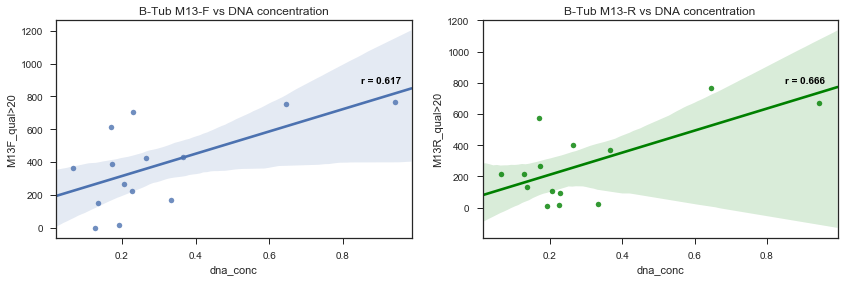

In [345]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 4)

plt.subplot(1, 2, 1)

corr_coef = x.corr(y)
sns_plot = sns.regplot(x=x, y=y, data=sa_subset, marker="o", scatter_kws={'s':30})
sns_plot.set_title("B-Tub M13-F vs DNA concentration")
sns_plot.text(0.96, 880, "r = %.3f" % corr_coef, horizontalalignment='right', size='medium', color='black', weight='semibold')


plt.subplot(1, 2, 2)

corr_coef = x.corr(y2)
sns_plot = sns.regplot(x=x, y=y2, data=sa_subset, marker="o", scatter_kws={'s':30}, color='g')
sns_plot.set_title("B-Tub M13-R vs DNA concentration")
sns_plot.text(0.96, 800, "r = %.3f" % corr_coef, horizontalalignment='right', size='medium', color='black', weight='semibold')

It seems clear that dna concentration does seriously affect sequencing. I think next time for samples less than ~0.3ng/ul I should add more template to hopefully compensate.

# ITS

**I'll repeat the above, this time looking at ITS band intensity and Q>20 scores.** 

Nothing new here, just a repition of the code above.

In [346]:
sa_subset = its_samples[its_samples['isolate_type'] == 'South African isolates']
sa_subset = sa_subset.iloc[::2, :] #slice out duplicates

In [347]:
#convert band intensities to a numerical scale for plotting
sa_subset['band_intensity'].replace(to_replace=['strong', 'average', 'weak'], value=[3, 2, 1], inplace=True)

In [348]:
sa_subset['band_intensity'].value_counts() #quick check

3    14
Name: band_intensity, dtype: int64

Uh oh. Above, all bands amplified really well (all 14 were strong). It will be completely pointless plotting this metric as I did for beta-tubulin, so we'll move straight on to Q<20 scores.

In [349]:
x = sa_subset['dna_conc']
y = sa_subset['M13F_qual>20']
y2 = sa_subset['M13R_qual>20'] 

Text(0.96,800,'r = 0.244')

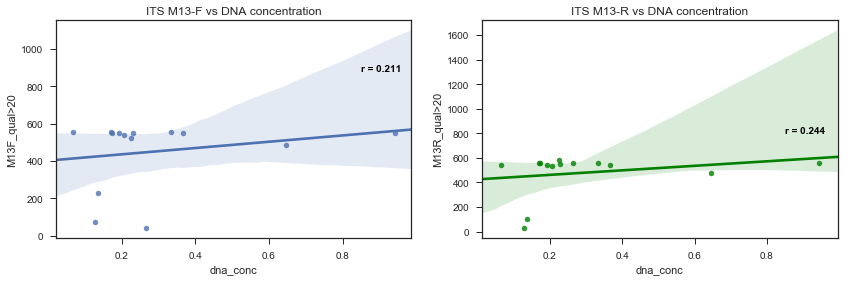

In [350]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 4)

plt.subplot(1, 2, 1)

corr_coef = x.corr(y)
sns_plot = sns.regplot(x=x, y=y, data=sa_subset, marker="o", scatter_kws={'s':30})
sns_plot.set_title("ITS M13-F vs DNA concentration")
sns_plot.text(0.96, 880, "r = %.3f" % corr_coef, horizontalalignment='right', size='medium', color='black', weight='semibold')


plt.subplot(1, 2, 2)

corr_coef = x.corr(y2)
sns_plot = sns.regplot(x=x, y=y2, data=sa_subset, marker="o", scatter_kws={'s':30}, color='g')
sns_plot.set_title("ITS M13-R vs DNA concentration")
sns_plot.text(0.96, 800, "r = %.3f" % corr_coef, horizontalalignment='right', size='medium', color='black', weight='semibold')

Interestingly, the correlation between dna concentration and Q30 scores is quite a lot weaker. This makes sense, given that all these ITS bands amplified really well (band_intensity = strong) regardless of DNA concentration. PCR amplification is (as you'd expect) the ultimate determinant of the sequencing results, and is quantified by band strength. In this case of TUB, this amplification was correlated with the concentration of DNA (low DNA quantification samples didn't amplify well).

Really these results indicate that:

    1. DNA concentration matters a lot (i.e. is positively correlated with) for amplification sometimes (for my BTUB samples, but not in ITS in this case).
    2. If band intensity is weak, sequencing will rarely come back satisfactorily. 
    

# Gridplots

!!!!!!!!!!!!!!!!!!!!!!!!

In [358]:
data.head()

NameError: name 'data_new' is not defined

Quickly clean up some of the data

In [355]:
data['isolate_type'].replace(to_replace='Olumide Isolates', value='Olumide isolates', inplace=True)
data['band_intensity'].replace(to_replace=['strong', 'average', 'weak'], value=[3, 2, 1], inplace=True)

array(['Chris honours isolates', 'South African isolates',
       'Olumide isolates', 'Femi husk rot series isolates'], dtype=object)

In [365]:
a = data.iloc(data['band_intensity']=='dimer')
b = data.iloc(data['band_intensity']=='contam')

In [370]:
data['band_intensity'].values

array([3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 3, 3, 3, 3, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 2, 2, 3, 3, 3, 3,
       'contam', 'contam', 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 1, 2, 'dimer', 'dimer', 'dimer', 'dimer', 1, 1,
       1, 1, 1, 1, 1, 1, 'dimer', 'dimer', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=object)

In [376]:
data.drop(data[(data['band_intensity'] == 'dimer') | 
               (data['band_intensity'] == 'contam')].index, inplace=True)

#df = df.drop(df[df.score < 50].index)

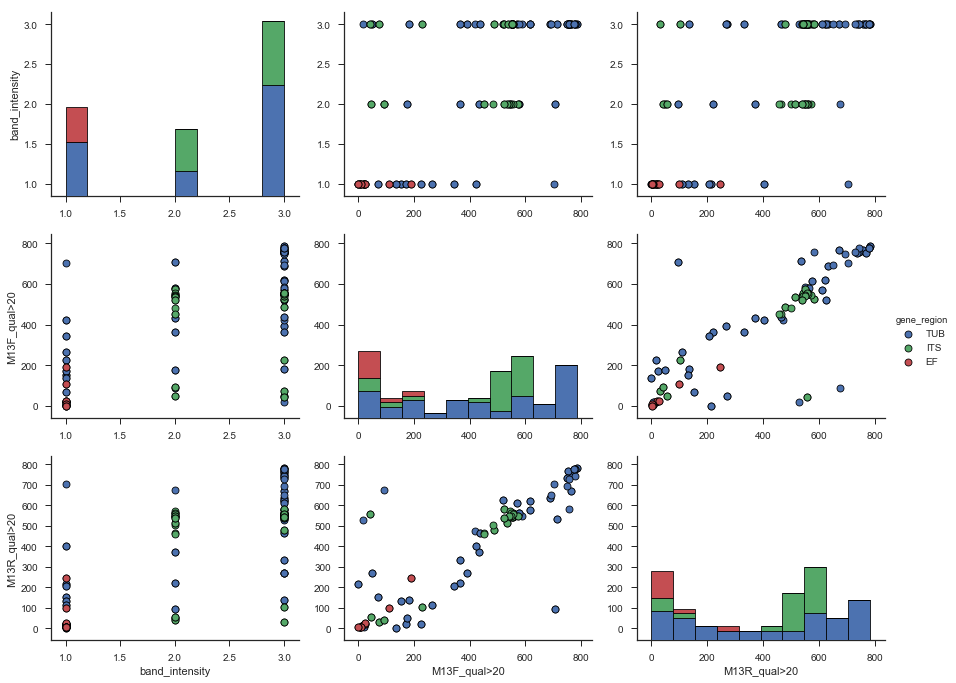

In [413]:
x = sns.PairGrid(data, vars=['band_intensity', 'M13F_qual>20', 'M13R_qual>20'], hue='gene_region', 
                 palette='deep', despine=True, size=3.2, aspect=1.3)
x = x.map_diag(plt.hist, edgecolor="k", linewidth=0.8) #this will only plot the histogram strip
x = x.map_offdiag(plt.scatter, edgecolor='black', linewidth=0.8) #fills in the remaining plots with scatterplots
x = x.add_legend()